<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


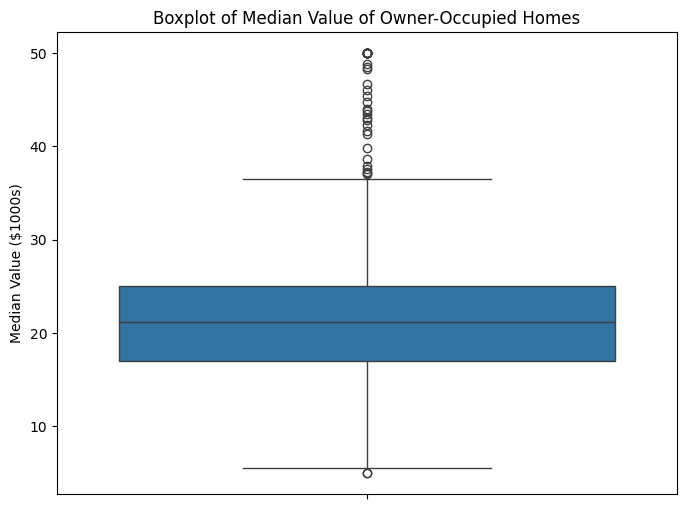

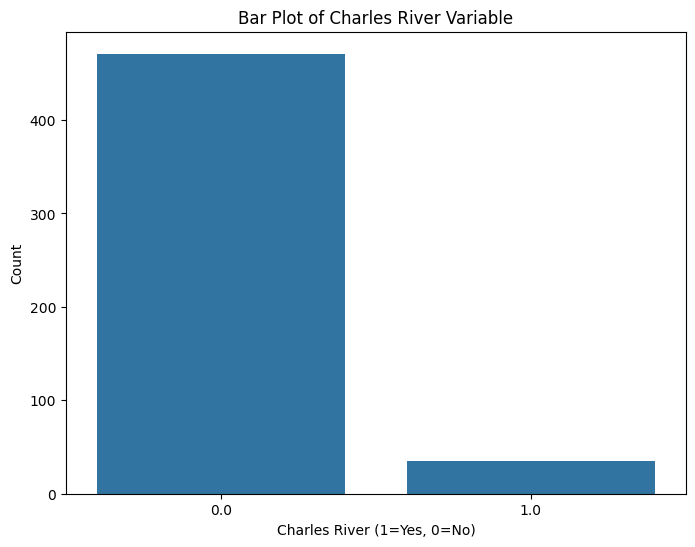

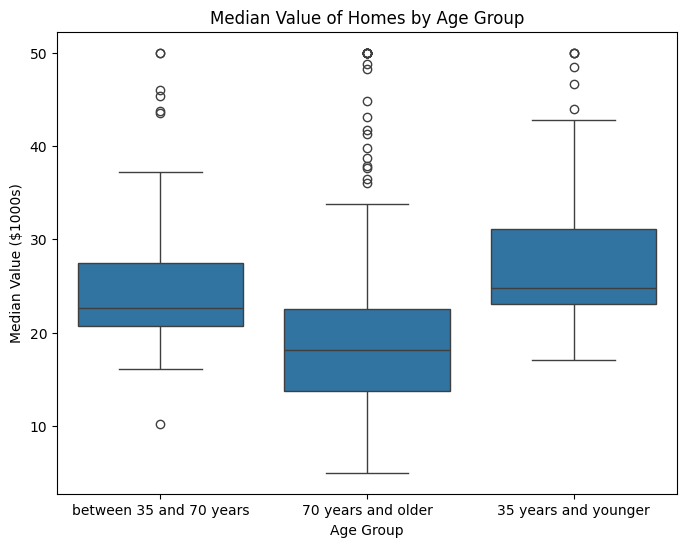

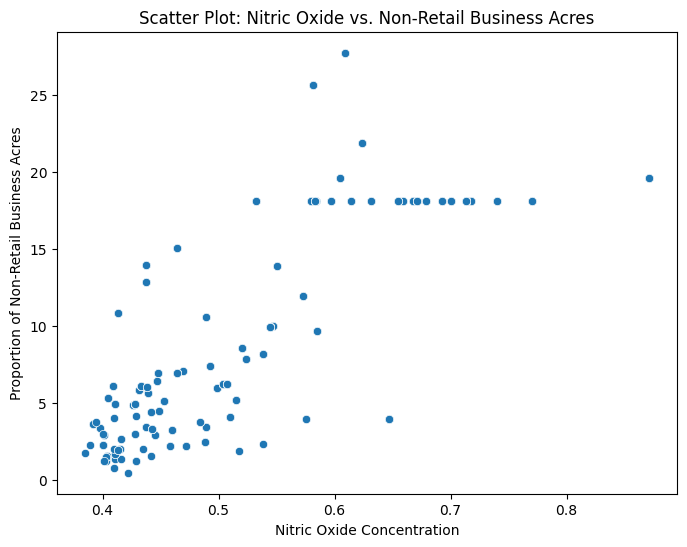

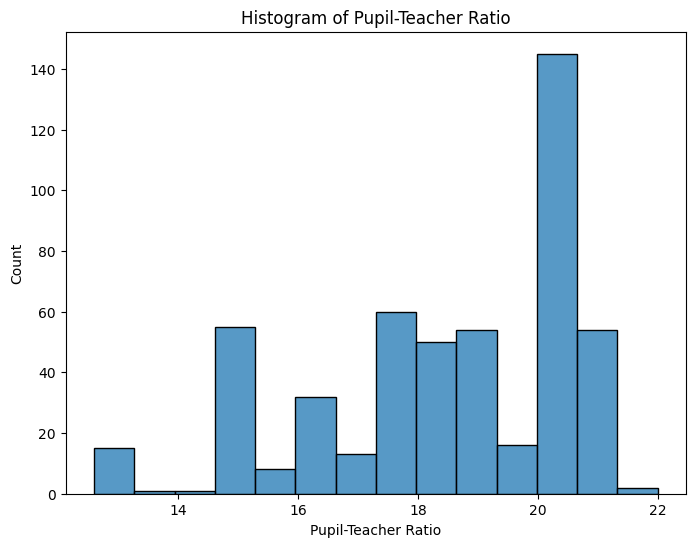

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

# --- TASK 2: VISUALIZATIONS ---

# 1. Boxplot for Median Value
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

# 2. Bar Plot for Charles River
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# 3. Boxplot for Age Groups
# Create age groups logic
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

plt.figure(figsize=(8, 6))
sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

# 4. Scatter Plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot: Nitric Oxide vs. Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

# 5. Histogram for Pupil-Teacher Ratio
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=False)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Count')
plt.show()

In [9]:
print("Test 1: T-test for Charles River")
print("Hypothesis: H0: No difference in mean median value. H1: Significant difference.")
stats_1, p_value_1 = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                                           boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                           equal_var=True)
print(f"P-value: {p_value_1}")
if p_value_1 < 0.05:
    print("Conclusion: Reject Null Hypothesis. There is a significant difference.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis. No significant difference.")

print("\nTest 2: ANOVA for Age Groups")
print("Hypothesis: H0: No difference in means across age groups. H1: At least one mean is different.")
f_stat, p_value_2 = scipy.stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                                         boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                                         boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print(f"P-value: {p_value_2}")
if p_value_2 < 0.05:
    print("Conclusion: Reject Null Hypothesis. Age significantly affects house value.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis. Age does not significantly affect value.")

print("\nTest 3: Pearson Correlation for NOX vs INDUS")
print("Hypothesis: H0: No correlation. H1: Correlation exists.")
corr_coef, p_value_3 = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Coefficient: {corr_coef}")
print(f"P-value: {p_value_3}")
if p_value_3 < 0.05:
    print("Conclusion: Reject Null Hypothesis. There is a significant relationship.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis. No relationship.")

print("\nTest 4: Regression Analysis for Distance to Employment Centers")
print("Hypothesis: H0: Weighted distance has no impact. H1: Weighted distance has an impact.")
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

Test 1: T-test for Charles River
Hypothesis: H0: No difference in mean median value. H1: Significant difference.
P-value: 7.390623170519905e-05
Conclusion: Reject Null Hypothesis. There is a significant difference.

Test 2: ANOVA for Age Groups
Hypothesis: H0: No difference in means across age groups. H1: At least one mean is different.
P-value: 1.7105011022702984e-15
Conclusion: Reject Null Hypothesis. Age significantly affects house value.

Test 3: Pearson Correlation for NOX vs INDUS
Hypothesis: H0: No correlation. H1: Correlation exists.
Pearson Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Conclusion: Reject Null Hypothesis. There is a significant relationship.

Test 4: Regression Analysis for Distance to Employment Centers
Hypothesis: H0: Weighted distance has no impact. H1: Weighted distance has an impact.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062


In [10]:
# And this completes the final project